<a href="https://colab.research.google.com/github/mollah2022/Neural-Network/blob/main/ClassicificationModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.3371 - loss: 1.1318 - val_accuracy: 0.4667 - val_loss: 0.9875
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4717 - loss: 0.9676 - val_accuracy: 0.5667 - val_loss: 0.9000
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6148 - loss: 0.8929 - val_accuracy: 0.7000 - val_loss: 0.8234
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6894 - loss: 0.8064 - val_accuracy: 0.7000 - val_loss: 0.7572
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7425 - loss: 0.7527 - val_accuracy: 0.7667 - val_loss: 0.7122
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8238 - loss: 0.6933 - val_accuracy: 0.9667 - val_loss: 0.6553
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9344 - loss: 0.6435 - val_accuracy: 0.7000 - val_loss: 0.6019
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6996 - loss: 0.6046 - val_accuracy: 0.7667 - val_loss

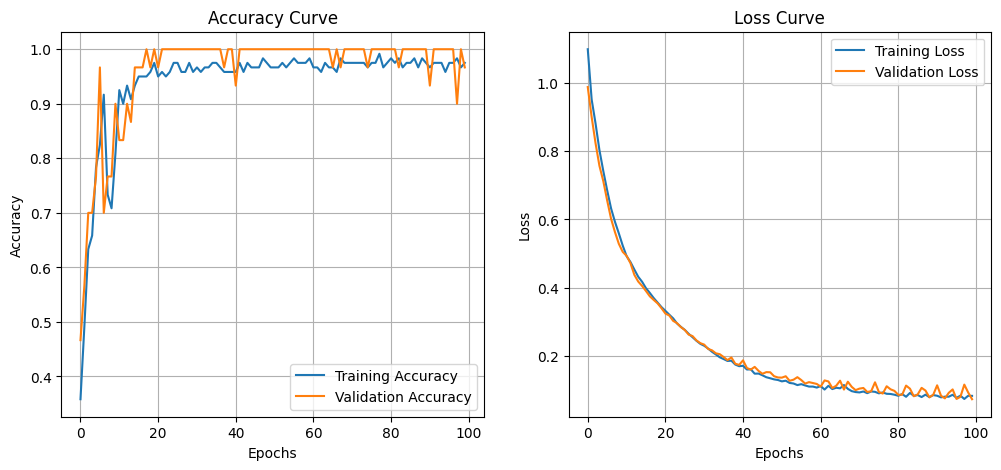

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,275 (106.55 KB)

 Trainable params: 9,091 (35.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,184 (71.04 KB)

In [1]:
# 1. প্রয়োজনীয় লাইব্রেরি ইমপোর্ট করি
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder

# 2. ডেটা লোড করা (Iris Dataset)
data = load_iris()
X = data.data    # Feature (চারটি: sepal length, sepal width, petal length, petal width)
y = data.target.reshape(-1, 1)   # Target (3 ধরনের ফুল)

# 3. Target Variable (y) কে One-Hot Encode করি (কারণ এটা classification)
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 5. Model তৈরি করা (ANN)
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(4,)),  # Hidden Layer 1
    keras.layers.Dense(64, activation='relu'),                    # Hidden Layer 2
    keras.layers.Dense(3, activation='softmax')                   # Output Layer (3 Class)
])

# 6. Model কম্পাইল করা
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 7. Model ট্রেনিং
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# 8. Accuracy & Loss Graph আঁকা
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

# 9. Model Summary
model.summary()
